In [1]:
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Esercizio 3

Write a Python program that optimizes the Griewank Problem through two evolutionary algorithms: a genetic algorithm and the differential evolution.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = 1 + \sum_{i=0}^{n-1} \frac{x_i^2}{4000} - \prod_{i=0}^{n-1} cos\left(\frac{x_i}{\sqrt{i}}\right)$$

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [3]:
IND_SIZE=10
TOURN_SIZE = 3

random.seed(a=0)

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.uniform(-600,600))
#individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE) 
#population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [4]:
#Evaluate function
def evaluate(individual):
    sommatoria = 0
    produttoria = 1
    for i in individual:
        cos = np.cos(i/(individual.index(i)+1))
        sommatoria += i**2
        produttoria = produttoria * cos
    return 1+sommatoria/4000-produttoria
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [5]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    #print(fitness)
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]
        evaluation_no += 1


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            if evaluation_no<ev_limit:
                #print(evaluation_no)
                ind.fitness.values = [fit]
                evaluation_no += 1
            else:
                ind.fitness.values = [1000]

        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        #print(pop)

        record = stats.compile(pop) if stats else{}
        #print(record['max'])
        
        if record['max'] != 1000:
            logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
    print(evaluation_no)
    return pop, logbook

In [6]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    #print(fitness)
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]
        evaluation_no += 1


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            if evaluation_no>=ev_limit:
                break    
            ind.fitness.values = [fit]
            evaluation_no += 1

        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        #print(pop)

        record = stats.compile(pop) if stats else{}
        #print(record['max'])
        
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        
        if evaluation_no>=ev_limit:
            break
    #print(evaluation_no)
    return pop, logbook

In [7]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    #print(fitness)
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]
        evaluation_no += 1


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            if evaluation_no>=ev_limit:
                break    
            ind.fitness.values = [fit]
            evaluation_no += 1
        if evaluation_no >= ev_limit:
            offspring = [ind for ind in offspring if ind.fitness.valid]
        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        #print(pop)

        record = stats.compile(pop) if stats else{}
        #print(record['max'])
        
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        
        if evaluation_no>=ev_limit:
            break
    print(evaluation_no)
    return pop, logbook


In [8]:
GA_exe = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=200, stats=stats)
GA_exe2 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=500, stats=stats)
GA_exe3 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=1000, stats=stats)
GA_exe4 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=1000000000000, stats=stats)

def iterate(f):
    sum = 0
    for i in range(15):
        sum += f[1][len(f[1])-1]['min']
    return sum/15

means = [iterate(GA_exe), iterate(GA_exe2), iterate(GA_exe3)]
#print(means)

200
500
1000
1990


In [9]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 279.27232681531876,
  'std': 76.81960010097745,
  'min': 139.7774268968916,
  'max': 366.35459884053313},
 {'gen': 1,
  'nevals': 8,
  'avg': 183.3276437559677,
  'std': 47.833905114213636,
  'min': 129.02340243851734,
  'max': 251.81547454395042},
 {'gen': 2,
  'nevals': 8,
  'avg': 131.61913951032733,
  'std': 10.457131565896438,
  'min': 119.57740290681369,
  'max': 147.45204726418888},
 {'gen': 3,
  'nevals': 10,
  'avg': 119.10440667342527,
  'std': 9.245493003961663,
  'min': 102.3106058510684,
  'max': 129.02340243851734},
 {'gen': 4,
  'nevals': 8,
  'avg': 105.941699094418,
  'std': 7.2730529451626955,
  'min': 102.3106058510684,
  'max': 121.35474122881907},
 {'gen': 5,
  'nevals': 10,
  'avg': 102.3106058510684,
  'std': 0.0,
  'min': 102.3106058510684,
  'max': 102.3106058510684},
 {'gen': 6,
  'nevals': 9,
  'avg': 102.3106058510684,
  'std': 0.0,
  'min': 102.3106058510684,
  'max': 102.3106058510684},
 {'gen': 7,
  'nevals': 4,
  'avg

In [10]:
GA_exe2[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 301.6404142911971,
  'std': 70.27511293687121,
  'min': 192.2262109029891,
  'max': 414.0777302636108},
 {'gen': 1,
  'nevals': 7,
  'avg': 228.06326057720193,
  'std': 34.30114838190866,
  'min': 174.41610956729056,
  'max': 272.7536094844101},
 {'gen': 2,
  'nevals': 10,
  'avg': 193.88670915723964,
  'std': 25.20693653481422,
  'min': 174.41610956729056,
  'max': 234.6562078431506},
 {'gen': 3,
  'nevals': 6,
  'avg': 175.2016697643193,
  'std': 2.3566805910861715,
  'min': 174.41610956729056,
  'max': 182.2717115375778},
 {'gen': 4,
  'nevals': 10,
  'avg': 174.41610956729056,
  'std': 0.0,
  'min': 174.41610956729056,
  'max': 174.41610956729056},
 {'gen': 5,
  'nevals': 7,
  'avg': 174.40869820784275,
  'std': 0.014822718895641173,
  'min': 174.37905277005146,
  'max': 174.41610956729056},
 {'gen': 6,
  'nevals': 10,
  'avg': 174.4032371865906,
  'std': 0.020533448189165273,
  'min': 174.37905277005146,
  'max': 174.43561294924714},
 {'gen': 7

In [11]:
GA_exe3[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 298.59185171621493,
  'std': 64.97634795632867,
  'min': 195.25311589151778,
  'max': 408.7437789446806},
 {'gen': 1,
  'nevals': 7,
  'avg': 211.5587580455273,
  'std': 72.59744344310724,
  'min': 116.55549584712585,
  'max': 330.7766674019379},
 {'gen': 2,
  'nevals': 8,
  'avg': 126.47070090873565,
  'std': 48.11538127490722,
  'min': 75.64475962550726,
  'max': 227.87842893725065},
 {'gen': 3,
  'nevals': 8,
  'avg': 80.10960722372592,
  'std': 17.571124210585054,
  'min': 64.87067959674496,
  'max': 127.10789696559453},
 {'gen': 4,
  'nevals': 6,
  'avg': 68.2257085982331,
  'std': 4.864807089398721,
  'min': 64.78838239380957,
  'max': 75.64475962550726},
 {'gen': 5,
  'nevals': 7,
  'avg': 64.99628749917572,
  'std': 0.34906545289014845,
  'min': 64.63744482566838,
  'max': 65.61198558329664},
 {'gen': 6,
  'nevals': 7,
  'avg': 64.70667525144269,
  'std': 0.09961633833438112,
  'min': 64.60925838869333,
  'max': 64.87067959674496},
 {'gen': 

In [12]:
GA_exe[1][0]['min'], GA_exe2[1][0]['min'], GA_exe3[1][0]['min']


(139.7774268968916, 192.2262109029891, 195.25311589151778)

In [13]:
GA_exe[1][len(GA_exe)]['min'], GA_exe2[1][len(GA_exe2)]['min'], GA_exe3[1][len(GA_exe3)]['min']

(119.57740290681369, 174.41610956729056, 75.64475962550726)

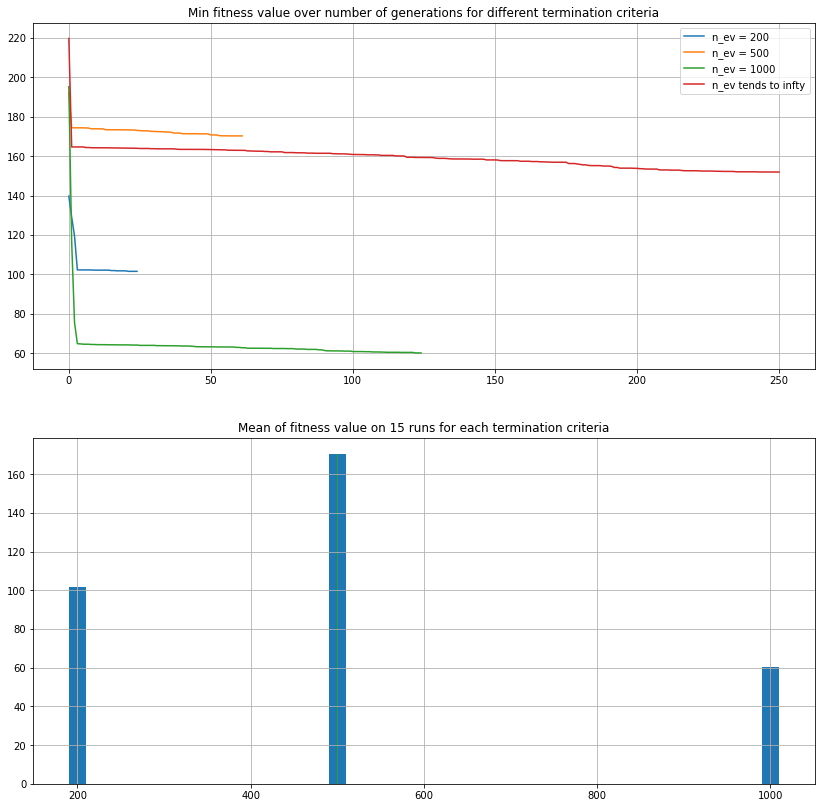

In [14]:
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]
min_values2 = [GA_exe2[1][i]['min'] for i in range(len(GA_exe2[1]))]
ngen2 = [i for i in range(len(GA_exe2[1]))]
min_values3 = [GA_exe3[1][i]['min'] for i in range(len(GA_exe3[1]))]
ngen3 = [i for i in range(len(GA_exe3[1]))]
min_values4 = [GA_exe4[1][i]['min'] for i in range(len(GA_exe4[1]))]
ngen4 = [i for i in range(len(GA_exe4[1]))]

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(14,14))
ax1.plot(ngen, min_values, label="n_ev = 200")
ax1.plot(ngen2, min_values2, label="n_ev = 500")
ax1.plot(ngen3, min_values3, label="n_ev = 1000")
ax1.plot(ngen4, min_values4, label="n_ev tends to infty")
ax1.grid()
ax1.set_title("Min fitness value over number of generations for different termination criteria")
ax1.legend()
ax2.bar((200,500,1000), means[0:3], width= 20)
ax2.bar(200, means[0])
ax2.bar(500, means[1])
ax2.bar(1000,means[2])
ax2.grid()
ax2.set_title("Mean of fitness value on 15 runs for each termination criteria")
plt.show()